In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.misc
from scipy.fft import fft, fftfreq
from scipy.optimize import leastsq
from scipy.optimize import curve_fit
from uncertainties import ufloat


In [113]:
def THz2nm(THz):
    return (299792458 / (THz * 1e12)) * 1e9

def lorentzian(x, x0, a, gam ):
    return a * gam**2 / ( gam**2 + ( x - x0 )**2)

def find_nearest_index(a, a0):
    "Index of element in nd array `a` closest to the scalar value `a0`"
    return np.abs(a - a0).argmin()

def norm_res(predicted, observed, errors):
    res = observed-predicted
    return res / errors 

def chi_2(predicted, observed, errors):
    return np.sum(((observed-predicted) / errors) ** 2)

def red_chi_2(predicted, observed, errors, DoF):
    return np.sum(((observed-predicted) / errors) ** 2) / DoF


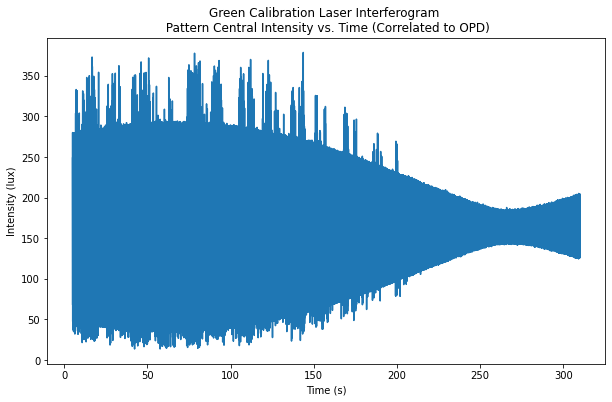

In [114]:
raw_data_array = pd.read_csv('laser 5.csv')
raw_data = pd.DataFrame(raw_data_array).to_numpy()
I = raw_data[5000:310000,1]
t = raw_data[5000:310000,0]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(t,I)
plt.ylabel("Intensity (lux)")
plt.xlabel("Time (s)")
plt.title("Green Calibration Laser Interferogram \n Pattern Central Intensity vs. Time (Correlated to OPD)")
plt.show()


In [115]:
yf = np.abs(fft(I))
xffreq = fftfreq(len(I))

min_ind = np.where(xffreq == 0)[0][0] + 1
max_ind = np.where(xffreq == 0.03)[0][0]

yData = yf[min_ind:max_ind]/max(yf[min_ind:max_ind])
xData = xffreq[min_ind:max_ind]

curve_fit(lorentzian, xData, yData, p0=[.00615, 1.75e6, .001])


(array([0.00622512, 0.34616613, 0.00073595]),
 array([[ 4.14475164e-11,  2.31595468e-12, -1.48586881e-14],
        [ 2.31595468e-12,  9.17430205e-06, -1.95333178e-08],
        [-1.48586881e-14, -1.95333178e-08,  8.31505925e-11]]))

In [116]:
# Frequency in THz divided by the peak location (should be at this frequency)
calibration = 564 / 0.00622512


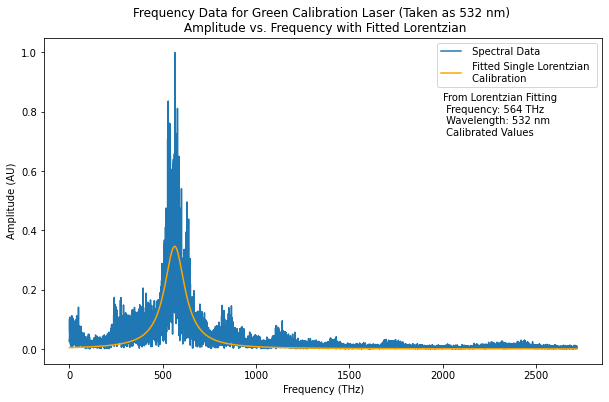

In [117]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(xData * calibration, yData, label=" Spectral Data")
plt.plot(xData * calibration, lorentzian(xData * calibration, 0.00622512 * calibration, 0.34616613, 0.00073595 * calibration), color="orange", label=" Fitted Single Lorentzian \n Calibration")
plt.text(2000, .72, "From Lorentzian Fitting  \n Frequency: 564 THz \n Wavelength: 532 nm \n Calibrated Values")
plt.legend()
# plt.xlim(0, .03 * calibration)
# plt.ylim(0,2.5e6)
plt.ylabel("Amplitude (AU)")
plt.xlabel("Frequency (THz)")
plt.title("Frequency Data for Green Calibration Laser (Taken as 532 nm) \n Amplitude vs. Frequency with Fitted Lorentzian")
plt.show()

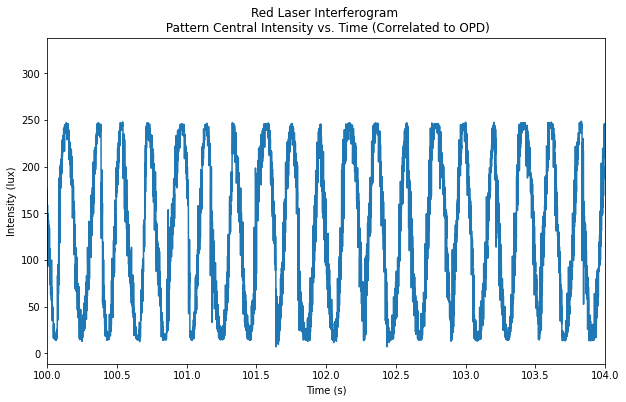

In [156]:
raw_data_array = pd.read_csv('laser 7.csv')
raw_data = pd.DataFrame(raw_data_array).to_numpy()
I = raw_data[8000:316000,1]
t = raw_data[8000:316000,0]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(t,I)
plt.ylabel("Intensity (lux)")
plt.xlabel("Time (s)")
plt.xlim(100,104)
plt.title("Red Laser Interferogram \n Pattern Central Intensity vs. Time (Correlated to OPD)")
plt.show()


In [147]:
yf = np.abs(fft(I))
xffreq = fftfreq(len(I))

min_ind = np.where(xffreq == 0)[0][0] + 1
max_ind = find_nearest_index(xffreq, .03)

yData = yf[min_ind:max_ind]/max(yf[min_ind:max_ind])
xData = xffreq[min_ind:max_ind] * calibration

lin_opt, lin_cov = curve_fit(lorentzian, xData, yData, p0=[.005 * calibration, 1, .001 * calibration])

x_0, a, gamma = lin_opt
dx_0, da, dgamma = np.sqrt(np.diag(lin_cov))

THz2nm(ufloat(x_0, dx_0))

654.4023836690739+/-0.6531181767829571

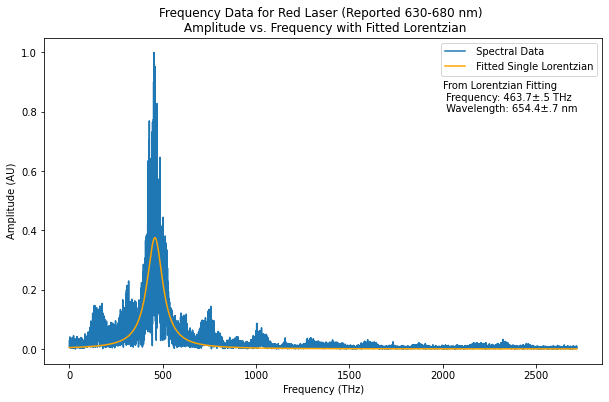

In [148]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(xData, yData, label=" Spectral Data")
plt.plot(xData, lorentzian(xData, x_0, a, gamma), color="orange", label=" Fitted Single Lorentzian")
plt.text(2000, .8, "From Lorentzian Fitting  \n Frequency: 463.7±.5 THz \n Wavelength: 654.4±.7 nm")
plt.legend()
plt.ylabel("Amplitude (AU)")
plt.xlabel("Frequency (THz)")
plt.title("Frequency Data for Red Laser (Reported 630-680 nm) \n Amplitude vs. Frequency with Fitted Lorentzian")
plt.show()

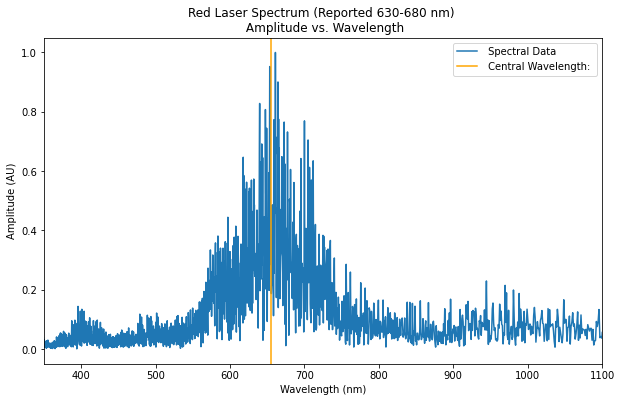

In [149]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(THz2nm(xData), yData, label=" Spectral Data")
plt.axvline(THz2nm(x_0), color="orange", label=" Central Wavelength: ")
plt.legend()
plt.xlim(350, 1100)
# plt.xlim(649, 660)
plt.ylabel("Amplitude (AU)")
plt.xlabel("Wavelength (nm)")
plt.title("Red Laser Spectrum (Reported 630-680 nm) \n Amplitude vs. Wavelength")
plt.show()

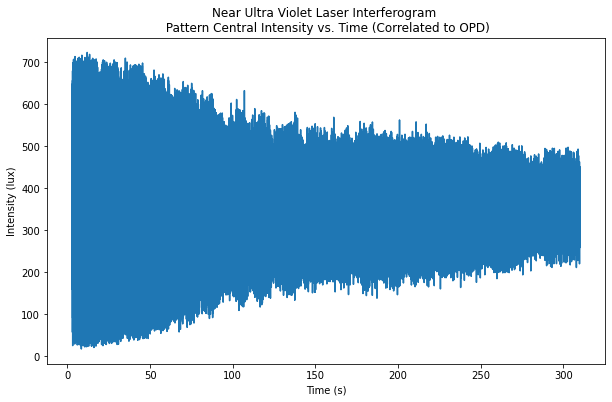

In [157]:
raw_data_array = pd.read_csv('laser 8.csv')
raw_data = pd.DataFrame(raw_data_array).to_numpy()
I = raw_data[3000:310000,1]
t = raw_data[3000:310000,0]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(t,I)
plt.ylabel("Intensity (lux)")
plt.xlabel("Time (s)")
plt.title("Near Ultra Violet Laser Interferogram \n Pattern Central Intensity vs. Time (Correlated to OPD)")
plt.show()


In [158]:
yf = np.abs(fft(I))
xffreq = fftfreq(len(I))

min_ind = np.where(xffreq == 0)[0][0] + 2
max_ind = find_nearest_index(xffreq, .03)

yData = yf[min_ind:max_ind]/max(yf[min_ind:max_ind])
xData = xffreq[min_ind:max_ind] * calibration

lin_opt, lin_cov = curve_fit(lorentzian, xData, yData, p0=[.005 * calibration, 1, .001 * calibration])

x_0, a, gamma = lin_opt
dx_0, da, dgamma = np.sqrt(np.diag(lin_cov))

THz2nm(ufloat(x_0, dx_0))

# THz2nm(ufloat(743, 10))

416.28077478803385+/-0.6065577242279084

In [163]:
THz2nm(ufloat(x_0, gamma / 2))

416.28077478803385+/-34.05691549665524

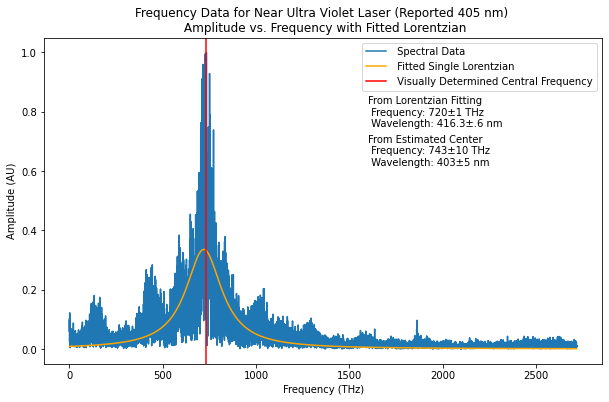

In [159]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(xData, yData, label=" Spectral Data")
plt.plot(xData, lorentzian(xData, x_0, a, gamma), color="orange", label=" Fitted Single Lorentzian")
plt.axvline(.0081 * calibration, color="red", label=" Visually Determined Central Frequency")
plt.text(1600, .75, "From Lorentzian Fitting  \n Frequency: 720±1 THz \n Wavelength: 416.3±.6 nm")
plt.text(1600, .62, "From Estimated Center  \n Frequency: 743±10 THz \n Wavelength: 403±5 nm")
# plt.xlim(650, 850)
plt.legend()
plt.ylabel("Amplitude (AU)")
plt.xlabel("Frequency (THz)")
plt.title("Frequency Data for Near Ultra Violet Laser (Reported 405 nm) \n Amplitude vs. Frequency with Fitted Lorentzian")
plt.show()


# NOTE 

We did not include the data for the ThorLabs spectrums in the github as it was over 100 mb and I could not upload it. Please email atpierce@berkeley.edu if you would like the data.

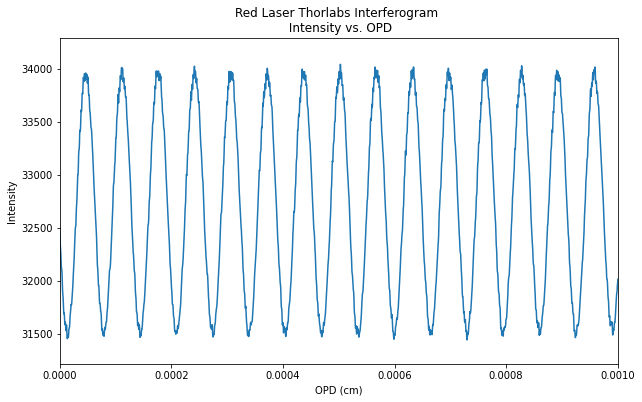

In [160]:
raw_data_array = pd.read_csv('650nm_interferogram.csv')
raw_data = pd.DataFrame(raw_data_array).to_numpy()
I = raw_data[:,1]
OPD = raw_data[:,0]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(OPD,I)
plt.ylabel("Intensity")
plt.xlabel("OPD (cm)")
plt.xlim(0,.001)
plt.title("Red Laser Thorlabs Interferogram \n Intensity vs. OPD")
plt.show()


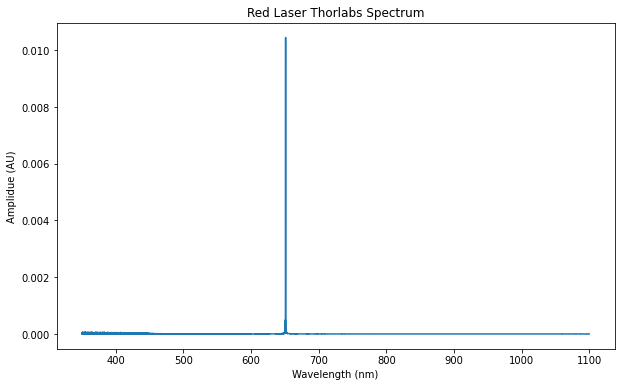

In [138]:
raw_data_array = pd.read_csv('650nm_spectrum.csv')
raw_data = pd.DataFrame(raw_data_array).to_numpy()
I = raw_data[:,1]
w = raw_data[:,0]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(w,I)
plt.ylabel("Amplidue (AU)")
# plt.xlim(649, 660)
plt.xlabel("Wavelength (nm)")
plt.title("Red Laser Thorlabs Spectrum")
plt.show()


In [145]:
len(w)

39776

In [150]:
# red laser

find_nearest_index(xData, 1100) - find_nearest_index(xData, 350)

2549